In [62]:
import gymnasium as gym
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output


In [63]:
env = gym.make("MountainCar-v0", render_mode="rgb_array", max_episode_steps=-1)
env.reset()

(array([-0.5558473,  0.       ], dtype=float32), {})

In [ ]:
# yes I'm using starting pos as I'm too lazy to check where it starts every time
def simple_agent(starting_pos, observation):
    position, velocity = observation
    try:
        position = float(position[0])
    except IndexError:
        position = float(position)

    if isinstance(velocity, dict) and len(velocity) == 0:
        print('start push')
        return 2
    # 3 - 4
    if (starting_pos - 0.2 < position < starting_pos + 0.2) and velocity > 0:
        print('---> (start)')
        return 2

    if position < starting_pos - 0.2 and velocity > -0.05:
        print('---> (big start)')
        return 2
    if (starting_pos + 0.2 < position < starting_pos + 0.4) and velocity < 0.02:
        print('<--- (return start)')
        return 0
    if velocity < 0:
        print('<--- (velocity < 0)')
        return 0
    if position > starting_pos + 0.2:
        print('---> (go for finish)')
        return 2

    return 1

    # actions
    # 0 left
    # 1 nothing
    # 2 right

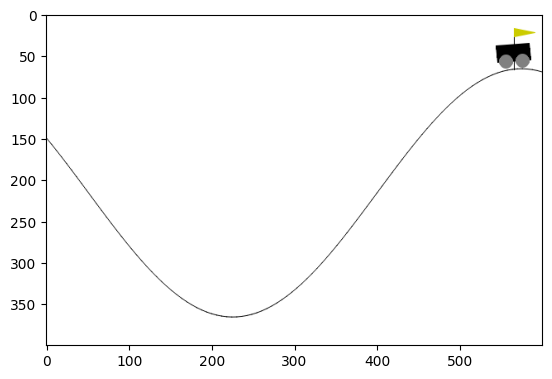

Step: 108
Position: 0.49880164861679077
Velocity: 0.020630162209272385
---> (go for finish)
Finished!
Step: 109


In [65]:
env.reset()
clear_output(wait=True)
plt.imshow(env.render())
plt.show()

observation = env.reset()
starting_pos, _ = observation
starting_pos = float(starting_pos[0])
print(starting_pos)
for step in range(150):
    action = simple_agent(starting_pos, observation)

    observation, reward, done, info, truncate = env.step(action)

    if done:
        print(f'Finished!\nStep: {step}')
        break

    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
    print(f'Step: {step}')
    print(f'Position: {observation[0]}')
    print(f'Velocity: {observation[1]}')

    # slow down the visual update
    time.sleep(0.01)
env.close()

the biggest difficulty was getting the observation into some readable format

I did also struggle a bit with defining what part of the action sequence the car is in but it wasn't anything really bad